In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

## 1. Q-learning in the wild (3 pts)

Here we use the qlearning agent on taxi env from openai gym.
You will need to insert a few agent functions here.

In [3]:
import random,math
import numpy as np
from collections import defaultdict

class QLearningAgent():
  """
    Q-Learning Agent

    Instance variables you have access to
      - self.epsilon (exploration prob)
      - self.alpha (learning rate)
      - self.discount (discount rate aka gamma)

    Functions you should use
      - self.getLegalActions(state)
        which returns legal actions for a state
      - self.getQValue(state,action)
        which returns Q(state,action)
      - self.setQValue(state,action,value)
        which sets Q(state,action) := value

    !!!Important!!!
    NOTE: please avoid using self._qValues directly to make code cleaner
  """
  def __init__(self,alpha,epsilon,discount,getLegalActions):
    "We initialize agent and Q-values here."
    self.getLegalActions= getLegalActions
    self._qValues = defaultdict(lambda:defaultdict(lambda:0))
    self.alpha = alpha
    self.epsilon = epsilon
    self.discount = discount

  def getQValue(self, state, action):
    #print(state)
    #print(action)
    if not (state in self._qValues) or not (action in self._qValues[state]):
        return 0.0
    return self._qValues[state][action]

  def setQValue(self,state,action,value):
    """
      Sets the Qvalue for [state,action] to the given value
    """
    self._qValues[state][action] = value

#---------------------#start of your code#---------------------#

  def getValue(self, state):
    possibleActions = self.getLegalActions(state)

    # If there are no legal actions, return 0.0
    if not possibleActions:
      return 0.0

    # Find the maximum Q-value among all possible actions
    return max(self.getQValue(state, action) for action in possibleActions)

  def getPolicy(self, state):
    """
      Compute the best action to take in a state.
    """
    possibleActions = self.getLegalActions(state)

    # If there are no legal actions, return None
    if not possibleActions:
      return None

    # Find the action with the highest Q-value
    best_action = max(possibleActions, key=lambda action: self.getQValue(state, action))
    return best_action

  def getAction(self, state):
    """
      Compute the action to take in the current state, including exploration.

      With probability self.epsilon, we should take a random action.
      otherwise - the best policy action (self.getPolicy).
    """
    possibleActions = self.getLegalActions(state)

    # If there are no legal actions, return None
    if not possibleActions:
      return None

    # Choose action with epsilon-greedy exploration
    if random.random() < self.epsilon:
      return random.choice(possibleActions)
    else:
      return self.getPolicy(state)

  def update(self, state, action, nextState, reward):
    """
      You should do your Q-Value update here.
    """
    # Agent parameters
    gamma = self.discount
    learning_rate = self.alpha

    # Compute the sample value
    future_value = self.getValue(nextState)
    sample = reward + gamma * future_value

    # Update the Q-value using the Q-learning formula
    current_q = self.getQValue(state, action)
    updated_q = (1 - learning_rate) * current_q + learning_rate * sample

    # Set the updated Q-value
    self.setQValue(state, action, updated_q)

In [4]:
import gym
env = gym.make("Taxi-v3")
n_actions = env.action_space.n

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [7]:
def play_and_train(env, agent, t_max=10**4):
    total_reward = 0.0
    s = env.reset()

    for t in range(t_max):
        a = agent.getAction(s)
        next_s, r, done, _ = env.step(a)
        s = next_s
        total_reward += r
        if done:
            break

    return total_reward

In [8]:
agent = QLearningAgent(alpha=0.1,epsilon=0.1,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

Достигните положительной награды, постройте график

In [9]:
from IPython.display import clear_output


Episode 900, Epsilon: 0.010, Average Reward: -204.86


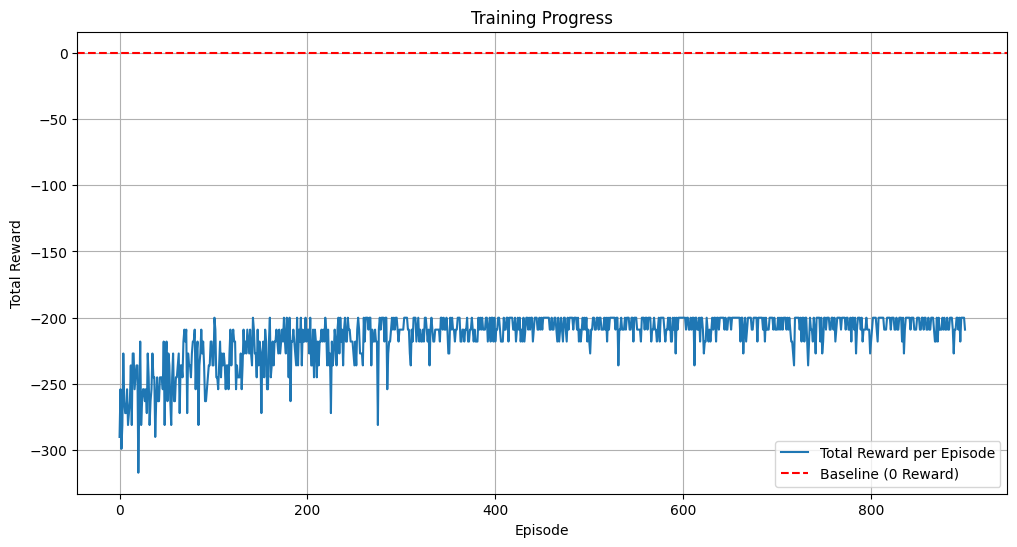

In [11]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

rewards = []

num_episodes = 1000

epsilon_decay = 0.995
min_epsilon = 0.01

for i in range(num_episodes):
    rewards.append(play_and_train(env, agent))
    agent.epsilon = max(min_epsilon, agent.epsilon * epsilon_decay)
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode {i}, Epsilon: {agent.epsilon:.3f}, Average Reward: {np.mean(rewards[-100:]):.2f}")
        plt.figure(figsize=(12, 6))
        plt.plot(rewards, label="Total Reward per Episode")
        plt.axhline(0, color='red', linestyle='--', label="Baseline (0 Reward)")
        plt.xlabel("Episode")
        plt.ylabel("Total Reward")
        plt.title("Training Progress")
        plt.legend()
        plt.grid()
        plt.show()



## 3. Continuous state space (2 pt)

Чтобы использовать табличный q-learning на continuous состояниях, надо как-то их обрабатывать и бинаризовать. Придумайте способ разбивки на дискретные состояния.

In [12]:

env = gym.make("CartPole-v0")
n_actions = env.action_space.n
def discretize_state(state, bins):
    """
    Разбиение состояния на дискретные значения.

    state: исходное состояние (например, (position, velocity, angle, angular velocity))
    bins: список с количеством интервалов для каждого признака
    """
    discretized_state = []
    for i, value in enumerate(state):
        discretized_state.append(int(np.digitize(value, np.linspace(min_value[i], max_value[i], bins[i]))))
    return tuple(discretized_state)

min_value = [-2.4, -3.0, -0.5, -2.0]
max_value = [2.4, 3.0, 0.5, 2.0]

bins = [10, 10, 10, 10]
state = env.reset()
print("First state:", state)
discretized_state = discretize_state(state, bins)
print("Discretized state:", discretized_state)



First state: [-0.00649324  0.00854838 -0.00775327 -0.04250602]
Discretized state: (5, 5, 5, 5)


/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


### Play a few games

Постройте распределения различных частей состояния игры. Сыграйте несколько игр и запишите все состояния.

## Binarize environment

In [ ]:
from gym.core import ObservationWrapper
class Binarizer(ObservationWrapper):

    def to_bin(self, value, bins):

        return

    def _observation(self,state):

        state = (self.to_bin(state[0], ), self.to_bin(state[1], ), self.to_bin(state[2], ), self.to_bin(state[3], ))

        return state

In [ ]:
env = Binarizer(gym.make("CartPole-v0"))

## Learn

In [ ]:
agent = QLearningAgent(alpha=,epsilon=,discount=,
                       getLegalActions = lambda s: range(n_actions))

In [ ]:
rewards = []
rewBuf = []
ma = -1000000000000
for i in range(10000):
    for i in range(100):
        rewards.append(play_and_train(env,agent))
    agent.epsilon *= #
    rewBuf.append(np.mean(rewards[-100:]))
    clear_output(True)
    print(agent.epsilon)
    print(rewBuf[-1])
    plt.plot(rewBuf)
    if(rewBuf[-1] > 195):
        print("Win!")
        break
    plt.show()


## 4. Experience replay (5 pts)

In [ ]:
import random
class ReplayBuffer(object):
    def __init__(self, size):
        """Create Replay buffer.
        Parameters
        ----------
        size: int
            Max number of transitions to store in the buffer. When the buffer
            overflows the old memories are dropped.
        """
        self._storage = []
        self._maxsize = size
        self._replaceId = 0


    def __len__(self):
        return len(self._storage)

    def add(self, obs_t, action, reward, obs_tp1, done):
        '''
        Make sure, _storage will not exceed _maxsize.
        '''
        data = (obs_t, action, reward, obs_tp1, done)
        if len(self._storage) == self._maxsize:
            #
        else:
            #

    def sample(self, batch_size):
        """Sample a batch of experiences.
        Parameters
        ----------
        batch_size: int
            How many transitions to sample.
        Returns
        -------
        obs_batch: np.array
            batch of observations
        act_batch: np.array
            batch of actions executed given obs_batch
        rew_batch: np.array
            rewards received as results of executing act_batch
        next_obs_batch: np.array
            next set of observations seen after executing act_batch
        done_mask: np.array
            done_mask[i] = 1 if executing act_batch[i] resulted in
            the end of an episode and 0 otherwise.
        """

        #

        return states, actions, rewards, next_states, is_done


Some tests to make sure your buffer works right

In [ ]:
import numpy as np
replay = ReplayBuffer(2)
obj1 = tuple(range(5))
obj2 = tuple(range(5, 10))
replay.add(*obj1)
assert replay.sample(1)==obj1, "If there's just one object in buffer, it must be retrieved by buf.sample(1)"
replay.add(*obj2)
assert len(replay._storage)==2, "Please make sure __len__ methods works as intended."
replay.add(*obj2)
assert len(replay._storage)==2, "When buffer is at max capacity, replace objects instead of adding new ones."
assert tuple(np.unique(a) for a in replay.sample(100))==obj2
replay.add(*obj1)
assert max(len(np.unique(a)) for a in replay.sample(100))==2
replay.add(*obj1)
assert tuple(np.unique(a) for a in replay.sample(100))==obj1
print ("Success!")

Now let's use this buffer to improve training:

In [ ]:
import gym
env = Binarizer(gym.make('CartPole-v0'))
n_actions = env.action_space.n

In [ ]:
agent = QLearningAgent(alpha=,epsilon=,discount=,
                       getLegalActions = lambda s: range(n_actions))
replay = ReplayBuffer(10000)

In [ ]:
def play_and_train(env, agent, t_max=10**4, batch_size=10):
    """This function should
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward"""
    total_reward = 0.0
    s = env.reset()

    for t in range(t_max):
        aсtion = agent.getAction(s)
        next_s, r, done,_ = env.step(aсtion)

        #заполните реплей
        #опционально - моежте также как в варианте без реплея обучаться по состояниям которые

        s = next_s
        total_reward +=r
        if done:break

    #learn from replay

    return total_reward




Train with experience replay

In [ ]:
rewards = []
rewBuf = []
ma = -1000000000000
for i in range(10000):
    for i in range(100):
        rewards.append(play_and_train(env,agent, batch_size=1000))
    agent.epsilon *= #
    rewBuf.append(np.mean(rewards[-100:]))
    clear_output(True)
    print(agent.epsilon)
    print(rewBuf[-1])
    plt.plot(rewBuf)
    if(rewBuf[-1] > 195):
        print("Win!")
        break
    plt.show()
